In [1]:
print("Please update the following 3 links to input files if needed (keep r in front of path!)")

Please update the following 3 links to input files if needed (keep r in front of path!)


In [2]:
#update links to input data
training_functions_link = r"C:\Users\anne-\Desktop\Datasets written assignment-231-1\train.csv"
ideal_functions_link = r"C:\Users\anne-\Desktop\Datasets written assignment-231-1\ideal.csv"
test_data_link = r"C:\Users\anne-\Desktop\Datasets written assignment-231-1\test.csv"

In [3]:
#import necessary python libraries
import sys
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import csv, sqlite3
import sqlalchemy
import pymysql
import sqlalchemy as db
import pytest
import ipytest
from sqlalchemy import create_engine
from bokeh.plotting import figure, output_file, show
from bokeh.models import  ColumnDataSource,Range1d, LabelSet, Label
from matplotlib import style

def main():
    print("python: {}".format(sys.version))
    print("pandas: {}".format(pd.__version__))
    print("numpy: {}".format(np.__version__))
    print("scipy: {}".format(scipy.__version__))
    print("scikit-learn: {}".format(sklearn.__version__))
    print("seaborn: {}".format(seaborn.__version__))
    print("matplotlib: {}".format(matplotlib.__version__))
    print("statsmodels: {}".format(statsmodels.__version__))
    print("pymysql: {}".format(pymysql.__version__))
    print("sqlalchemy: {}".format(sqlalchemy.__version__))
    print("pytest: {}".format(pytest.__version__))
    
if __name__=='__main__':
    main()

python: 3.10.10 | packaged by Anaconda, Inc. | (main, Mar 21 2023, 18:39:17) [MSC v.1916 64 bit (AMD64)]
pandas: 1.5.3
numpy: 1.23.5
scipy: 1.10.1
scikit-learn: 1.2.2
seaborn: 0.12.2
matplotlib: 3.7.1
statsmodels: 0.13.5
pymysql: 1.0.2
sqlalchemy: 1.4.39
pytest: 7.1.2


In [4]:
#create database where the final tables will be uploaded
def database_creation():
    try:
        #create a local SQLite database
        DATABASE_URL = "sqlite:///written_assignment.db"
        engine = create_engine(DATABASE_URL)
        #get connection object
        connection = engine.connect()
        #get meta data object
        meta_data = db.MetaData()
        meta_data.create_all(engine)
    except:
        exception_info = get_exception_info()
        print(exception_info)
    else:
        print('Database created.')
    finally:
        pass    
    
def main():
    database_creation()

if __name__=='__main__':
    main()

Database created.


In [5]:
#load training data into dataframe
df_training_data = pd.read_csv(training_functions_link)
#adjust column names
df_training_data.rename(columns={'y1': 'Y1 (training func)', 'y2': 'Y2 (training func)', 'y3': 'Y3 (training func)', 
                                 'y4': 'Y4 (training func)'}, inplace=True)

def main():
 
    display(df_training_data.head())

if __name__=='__main__':
    main()

,x,Y1 (training func),Y2 (training func),Y3 (training func),Y4 (training func)
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


In [6]:
#load ideal functions into dataframe
df_ideal_functions_new = pd.read_csv(ideal_functions_link)
    
#adjust column names
df_ideal_functions_new = df_ideal_functions_new.rename(columns={'y1': 'Y1 (ideal func)', 'y2': 'Y2 (ideal func)', 'y3': 'Y3 (ideal func)', 'y4': 'Y4 (ideal func)', 'y5': 'Y5 (ideal func)',
                                                'y6': 'Y6 (ideal func)', 'y7': 'Y7 (ideal func)', 'y8': 'Y8 (ideal func)', 'y9': 'Y9 (ideal func)', 'y10': 'Y10 (ideal func)',
                                                'y11': 'Y11 (ideal func)', 'y12': 'Y12 (ideal func)', 'y13': 'Y13 (ideal func)', 'y14': 'Y14 (ideal func)', 'y15': 'Y15 (ideal func)',
                                                'y16': 'Y16 (ideal func)', 'y17': 'Y17 (ideal func)', 'y18': 'Y18 (ideal func)', 'y19': 'Y19 (ideal func)', 'y20': 'Y20 (ideal func)',
                                                'y21': 'Y21 (ideal func)', 'y22': 'Y22 (ideal func)', 'y23': 'Y23 (ideal func)', 'y24': 'Y24 (ideal func)', 'y25': 'Y25 (ideal func)',
                                                'y26': 'Y26 (ideal func)', 'y27': 'Y27 (ideal func)', 'y28': 'Y28 (ideal func)', 'y29': 'Y29 (ideal func)', 'y30': 'Y30 (ideal func)',
                                                'y31': 'Y31 (ideal func)', 'y32': 'Y32 (ideal func)', 'y33': 'Y33 (ideal func)', 'y34': 'Y34 (ideal func)', 'y35': 'Y35 (ideal func)',
                                                'y36': 'Y36 (ideal func)', 'y37': 'Y37 (ideal func)', 'y38': 'Y38 (ideal func)', 'y39': 'Y39 (ideal func)', 'y40': 'Y40 (ideal func)',
                                                'y41': 'Y41 (ideal func)', 'y42': 'Y42 (ideal func)', 'y43': 'Y43 (ideal func)', 'y44': 'Y44 (ideal func)', 'y45': 'Y45 (ideal func)',
                                                'y46': 'Y46 (ideal func)', 'y47': 'Y47 (ideal func)', 'y48': 'Y48 (ideal func)', 'y49': 'Y49 (ideal func)', 'y50': 'Y50 (ideal func)'})

def main():    
    
    display(df_ideal_functions_new.head())
    
if __name__=='__main__':
    main()

,x,Y1 (ideal func),Y2 (ideal func),Y3 (ideal func),Y4 (ideal func),Y5 (ideal func),Y6 (ideal func),Y7 (ideal func),Y8 (ideal func),Y9 (ideal func),...,Y41 (ideal func),Y42 (ideal func),Y43 (ideal func),Y44 (ideal func),Y45 (ideal func),Y46 (ideal func),Y47 (ideal func),Y48 (ideal func),Y49 (ideal func),Y50 (ideal func)
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [7]:
#load test data into dataframe
df_test_data = pd.read_csv(test_data_link)

def main():
    
    display(df_test_data.head())
    
if __name__=='__main__':
    main()

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054


In [8]:
#create new dataframes to be able to compare training functions and ideal functions

#training function1
df_training_data1=df_training_data['Y1 (training func)']
df_training_data1_50=pd.concat([df_training_data1.T]*50, axis=1)
    
#training function2
df_training_data2=df_training_data['Y2 (training func)']
df_training_data2_50=pd.concat([df_training_data2.T]*50, axis=1)
    
#training function3
df_training_data3=df_training_data['Y3 (training func)']
df_training_data3_50=pd.concat([df_training_data3.T]*50, axis=1)
    
#training function4
df_training_data4=df_training_data['Y4 (training func)']
df_training_data4_50=pd.concat([df_training_data4.T]*50, axis=1) 

#drop x column from ideal functions dataframe
df_ideal_functions_new_50=df_ideal_functions_new.copy()
df_ideal_functions_new_50.drop(df_ideal_functions_new.columns[[0]], axis=1, inplace=True)

def main():
    
    display(df_training_data1_50.head(), df_training_data2_50.head(), df_training_data3_50.head(), 
            df_training_data4_50.head(), df_ideal_functions_new_50.head())
    
if __name__=='__main__':
    main()

,Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),...,Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func),Y1 (training func)
0,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,...,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572,39.778572
1,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,...,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813,39.604813
2,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,...,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070,40.099070
3,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,...,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100,40.151100
4,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,...,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662,39.795662


,Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),...,Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func),Y2 (training func)
0,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,...,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590,-40.078590
1,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,...,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000,-39.784000
2,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,...,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845,-40.018845
3,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,...,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402,-39.518402
4,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,...,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065,-39.360065


,Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),...,Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func),Y3 (training func)
0,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,...,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268,-20.214268
1,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,...,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950,-20.070950
2,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,...,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782,-19.906782
3,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,...,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118,-19.389118
4,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,...,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890,-19.815890


,Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),...,Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func),Y4 (training func)
0,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,...,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914,-0.324914
1,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,...,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820,-0.058820
2,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,...,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830,-0.451830
3,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,...,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044,-0.612044
4,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,...,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076,-0.306076


,Y1 (ideal func),Y2 (ideal func),Y3 (ideal func),Y4 (ideal func),Y5 (ideal func),Y6 (ideal func),Y7 (ideal func),Y8 (ideal func),Y9 (ideal func),Y10 (ideal func),...,Y41 (ideal func),Y42 (ideal func),Y43 (ideal func),Y44 (ideal func),Y45 (ideal func),Y46 (ideal func),Y47 (ideal func),Y48 (ideal func),Y49 (ideal func),Y50 (ideal func)
0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,18.258905,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,17.266117,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,16.110740,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,14.805996,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,13.366487,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [9]:
#create function to calculate the deviations squared between training functions and ideal functions
def deviationsquared(a,b):
    deviationsquared = (a-b)*(a-b)
    
    return (deviationsquared)

In [10]:
#run pytest with created function
ipytest.autoconfig()

In [11]:
%%ipytest

def test_deviationsquared():
    assert deviationsquared (2,5) == 9

.                                                                                            [100%]
1 passed in 0.02s


In [12]:
#identify ideal functions with the minimum deviation squared for each training function

#load ideal functions and training functions into a numpy array
ideal_functions50_array=df_ideal_functions_new_50.to_numpy()
training_func1_array=df_training_data1_50.to_numpy()
training_func2_array=df_training_data2_50.to_numpy()
training_func3_array=df_training_data3_50.to_numpy()
training_func4_array=df_training_data4_50.to_numpy()

#calculate squared deviation between training function and each ideal function using the deviationsquared function
squared_deviation_array1=deviationsquared(training_func1_array, ideal_functions50_array)
squared_deviation_array2=deviationsquared(training_func2_array, ideal_functions50_array)
squared_deviation_array3=deviationsquared(training_func3_array, ideal_functions50_array)
squared_deviation_array4=deviationsquared(training_func4_array, ideal_functions50_array)

#load squared deviations back into dataframe 
squared_deviation_df1=pd.DataFrame(squared_deviation_array1)
squared_deviation_df2=pd.DataFrame(squared_deviation_array2)
squared_deviation_df3=pd.DataFrame(squared_deviation_array3)
squared_deviation_df4=pd.DataFrame(squared_deviation_array4)

#add row with total squared deviation per function for training functions
Total1=squared_deviation_df1.sum()
squared_deviation_df1_total=squared_deviation_df1.append(Total1, ignore_index=True)
Total2=squared_deviation_df2.sum()
squared_deviation_df2_total=squared_deviation_df2.append(Total2, ignore_index=True)
Total3=squared_deviation_df3.sum()
squared_deviation_df3_total=squared_deviation_df3.append(Total3, ignore_index=True)
Total4=squared_deviation_df4.sum()
squared_deviation_df4_total=squared_deviation_df4.append(Total4, ignore_index=True)

#identify ideal function for training functions with minimum deviation squared (=first column)
squared_deviation_df1_total_sorted=squared_deviation_df1_total.sort_values(by=[400], axis=1)
squared_deviation_df2_total_sorted=squared_deviation_df2_total.sort_values(by=[400], axis=1)
squared_deviation_df3_total_sorted=squared_deviation_df3_total.sort_values(by=[400], axis=1)
squared_deviation_df4_total_sorted=squared_deviation_df4_total.sort_values(by=[400], axis=1)

def main(): 
    
    display(squared_deviation_df1_total_sorted.tail(), squared_deviation_df2_total_sorted.tail(), 
           squared_deviation_df3_total_sorted.tail(), squared_deviation_df4_total_sorted.tail())
    
if __name__=='__main__':
    main()

C:\Users\anne-\AppData\Local\Temp\ipykernel_14908\2784064854.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  squared_deviation_df1_total=squared_deviation_df1.append(Total1, ignore_index=True)
C:\Users\anne-\AppData\Local\Temp\ipykernel_14908\2784064854.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  squared_deviation_df2_total=squared_deviation_df2.append(Total2, ignore_index=True)
C:\Users\anne-\AppData\Local\Temp\ipykernel_14908\2784064854.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  squared_deviation_df3_total=squared_deviation_df3.append(Total3, ignore_index=True)
C:\Users\anne-\AppData\Local\Temp\ipykernel_14908\2784064854.py:30: FutureWarning: The frame.append method is deprecated and will be remove

,41,13,14,0,33,49,1,43,37,48,...,22,21,20,28,27,29,26,25,23,24
396,0.074330,380.520903,1043.738695,1583.157248,1626.011613,1582.038446,1587.092625,1528.380492,1525.490066,1583.157248,...,5.610653e+07,5.728436e+07,5.728436e+07,6.324707e+07,5.758143e+07,4.631242e+07,2.929699e+07,1.023497e+08,2.279550e+08,5.122397e+08
397,0.020644,369.658110,1028.901531,1574.349115,1609.069280,1563.359004,1567.062831,1514.302641,1522.437018,1574.349115,...,5.785803e+07,5.904846e+07,5.904846e+07,6.516347e+07,5.935161e+07,4.779122e+07,3.031941e+07,1.052110e+08,2.349989e+08,5.280825e+08
398,0.001067,379.340752,1048.248890,1607.235821,1634.445888,1586.094433,1588.659673,1541.677651,1560.962972,1607.235821,...,5.964651e+07,6.086603e+07,6.086603e+07,6.713686e+07,6.117537e+07,4.931675e+07,3.136532e+07,1.081498e+08,2.422400e+08,5.443567e+08
399,0.030112,393.028008,1074.196299,1647.757397,1667.886961,1616.191795,1617.818921,1577.078654,1607.640484,1647.757397,...,6.147931e+07,6.273153e+07,6.273153e+07,6.916141e+07,6.304716e+07,5.088403e+07,3.244002e+07,1.111587e+08,2.496692e+08,5.610513e+08
400,34.246594,53197.485192,123154.641543,212588.870331,212723.756744,212918.373245,212938.547403,212954.697762,213034.089335,213098.110984,...,3.606545e+09,3.656948e+09,3.708806e+09,3.715171e+09,3.734674e+09,3.771743e+09,4.424314e+09,4.452322e+09,1.473233e+10,3.307054e+10


,40,12,10,11,5,47,43,7,6,49,...,20,28,27,21,29,22,25,26,23,24
396,0.223824,23.696256,378.998352,472.285040,1580.050066,1506.875216,1527.271240,1466.394003,1599.864507,1474.558318,...,5.610711e+07,6.200977e+07,5.640112e+07,5.610711e+07,4.525452e+07,5.728376e+07,1.007741e+08,3.014937e+07,2.256005e+08,5.087072e+08
397,0.189824,33.773242,420.720607,436.330477,1677.971337,1597.088327,1617.964408,1697.946265,1691.053603,1568.051902,...,5.783848e+07,6.389207e+07,5.813851e+07,5.783848e+07,4.670330e+07,5.906821e+07,1.035938e+08,3.119719e+07,2.325788e+08,5.244516e+08
398,0.001026,29.581307,409.611859,456.297875,1668.930329,1584.228408,1604.109742,1554.447238,1675.106189,1559.439636,...,5.963474e+07,6.584338e+07,5.994094e+07,5.963474e+07,4.820904e+07,6.087793e+07,1.065064e+08,3.226002e+07,2.397773e+08,5.406619e+08
399,0.105654,33.164526,426.788703,446.947589,1716.155656,1627.571755,1646.034392,1631.380157,1715.954205,1606.559593,...,6.146623e+07,6.783252e+07,6.177866e+07,6.146623e+07,4.974509e+07,6.274474e+07,1.094723e+08,3.336100e+07,2.471385e+08,5.572545e+08
400,35.601847,10109.294499,53274.830149,55076.453657,212947.846998,213006.246479,213152.510385,213261.741255,213278.964515,213321.623097,...,3.606495e+09,3.612927e+09,3.631936e+09,3.658307e+09,3.669297e+09,3.708857e+09,4.345301e+09,4.532148e+09,1.452770e+10,3.276361e+10


,10,5,47,40,43,7,6,49,1,48,...,20,28,27,21,22,29,25,26,23,24
396,0.057962,421.181856,383.821490,388.098983,394.149146,363.527468,431.441848,367.598181,365.167865,367.059173,...,5.639552e+07,6.231295e+07,5.669029e+07,5.639552e+07,5.699309e+07,4.551358e+07,1.011605e+08,2.993859e+07,2.261785e+08,5.095749e+08
397,0.033623,410.800233,371.284592,410.433280,381.385251,420.713532,417.286071,357.353431,355.585867,352.127498,...,5.815369e+07,6.422334e+07,5.845453e+07,5.815369e+07,5.875053e+07,4.698659e+07,1.040154e+08,3.096644e+07,2.332104e+08,5.253999e+08
398,0.178132,407.701386,366.394720,425.551226,375.988071,352.145938,410.756727,354.524233,353.312967,344.632094,...,5.995427e+07,6.617910e+07,6.026128e+07,5.995427e+07,6.055594e+07,4.849638e+07,1.069333e+08,3.202575e+07,2.404176e+08,5.416231e+08
399,0.072534,420.181209,376.941752,424.489460,385.853829,378.775684,420.081531,366.865145,366.090524,352.051441,...,6.179482e+07,6.817769e+07,6.210809e+07,6.179482e+07,6.241363e+07,5.004074e+07,1.099107e+08,3.311968e+07,2.477969e+08,5.582430e+08
400,29.861830,53235.305639,53267.686149,53305.503558,53334.810798,53489.023805,53503.104582,53503.767133,53550.428082,53556.431400,...,3.631924e+09,3.638341e+09,3.657471e+09,3.657862e+09,3.683109e+09,3.694755e+09,4.371922e+09,4.505033e+09,1.457872e+10,3.284021e+10


,47,43,49,0,7,48,1,6,5,33,...,20,21,22,28,27,29,25,26,23,24
396,0.151347,0.423620,0.000869,0.001896,0.018478,0.001896,0.008642,2.461288,1.743421,0.334623,...,5.668430e+07,5.668430e+07,5.670353e+07,6.261648e+07,5.697982e+07,4.577304e+07,1.015471e+08,2.972882e+07,2.267564e+08,5.104422e+08
397,0.019261,0.014776,0.253749,0.412766,1.218316,0.412766,0.303099,1.040506,0.740767,1.161234,...,5.845006e+07,5.845006e+07,5.845340e+07,6.453477e+07,5.875167e+07,4.725303e+07,1.044117e+08,3.075082e+07,2.338036e+08,5.262900e+08
398,0.002254,0.040600,0.129675,0.390186,0.179239,0.390186,0.153897,1.162550,1.005404,0.926568,...,6.025180e+07,6.025180e+07,6.025766e+07,6.649168e+07,6.055957e+07,4.876401e+07,1.073305e+08,3.180893e+07,2.410130e+08,5.425167e+08
399,0.088884,0.277001,0.001359,0.125188,0.119237,0.125188,0.000277,1.901743,1.908455,0.361217,...,6.209574e+07,6.209574e+07,6.211194e+07,6.849375e+07,6.240977e+07,5.031157e+07,1.103119e+08,3.290001e+07,2.483992e+08,5.591467e+08
400,31.963434,42.902839,200.051907,220.819347,230.307728,232.391004,245.603915,245.674324,257.244016,365.853554,...,3.657402e+09,3.657470e+09,3.657524e+09,3.663802e+09,3.683056e+09,3.720267e+09,4.398574e+09,4.478067e+09,1.462973e+10,3.291675e+10


In [13]:
#Create function to put together ideal function names

def names(string):
    name = 'Y'+string+' (ideal func)'

    return (name)

In [14]:
%%ipytest

def test_names():
    assert names('42') == 'Y42 (ideal func)'

.                                                                                            [100%]
1 passed in 0.02s


In [15]:
#create new dataframe where the ideal functions columns are inserted next to the training functions

#identify the no. of ideal function for each training function
number_ideal_function1=squared_deviation_df1_total_sorted.columns.values[0]+1
number_ideal_function2=squared_deviation_df2_total_sorted.columns.values[0]+1
number_ideal_function3=squared_deviation_df3_total_sorted.columns.values[0]+1
number_ideal_function4=squared_deviation_df4_total_sorted.columns.values[0]+1

#convert ideal function numbers into strings
string1=str(number_ideal_function1)
string2=str(number_ideal_function2)
string3=str(number_ideal_function3)
string4=str(number_ideal_function4)

#compile ideal function names using the names function
name_ideal_function1=names(string1)
name_ideal_function2=names(string2)
name_ideal_function3=names(string3)
name_ideal_function4=names(string4)

#filter out the value columns of the four chosen ideal functions from the ideal functions dataframe
extracted_col_ideal_function1=df_ideal_functions_new_50.filter(regex=string1)
extracted_col_ideal_function2=df_ideal_functions_new_50.filter(regex=string2)
extracted_col_ideal_function3=df_ideal_functions_new_50.filter(regex=string3)
extracted_col_ideal_function4=df_ideal_functions_new_50.filter(regex=string4)

#insert value columns of the four chosen ideal functions into training functions dataframe
df_training_data_mapped=df_training_data.copy()
df_training_data_mapped.insert(loc=2, column=name_ideal_function1, value=extracted_col_ideal_function1)
df_training_data_mapped.insert(loc=4, column=name_ideal_function2, value=extracted_col_ideal_function2)
df_training_data_mapped.insert(loc=6, column=name_ideal_function3, value=extracted_col_ideal_function3)
df_training_data_mapped.insert(loc=8, column=name_ideal_function4, value=extracted_col_ideal_function4)


def main():
    
    display(df_training_data_mapped.head())

if __name__=='__main__':
    main()

,x,Y1 (training func),Y42 (ideal func),Y2 (training func),Y41 (ideal func),Y3 (training func),Y11 (ideal func),Y4 (training func),Y48 (ideal func)
0,-20.0,39.778572,40.204040,-40.078590,-40.456474,-20.214268,-20.0,-0.324914,-0.186278
1,-19.9,39.604813,40.048590,-39.784000,-40.233820,-20.070950,-19.9,-0.058820,-0.215690
2,-19.8,40.099070,39.890660,-40.018845,-40.006836,-19.906782,-19.8,-0.451830,-0.236503
3,-19.7,40.151100,39.729824,-39.518402,-39.775787,-19.389118,-19.7,-0.612044,-0.247887
4,-19.6,39.795662,39.565693,-39.360065,-39.540980,-19.815890,-19.6,-0.306076,-0.249389


In [16]:
#for mapping later: identify maximum deviation between training data and chosen ideal function

#drop total from dataframe with squared deviation 
squared_deviation_df1_total_sorted_nototal=squared_deviation_df1_total_sorted.drop(index=[400])
squared_deviation_df2_total_sorted_nototal=squared_deviation_df2_total_sorted.drop(index=[400])
squared_deviation_df3_total_sorted_nototal=squared_deviation_df3_total_sorted.drop(index=[400])
squared_deviation_df4_total_sorted_nototal=squared_deviation_df4_total_sorted.drop(index=[400])

#take square root of remaining values in order to see the "simple deviation"
squared_deviation_df1_total_sorted_nototal_sqrt=np.sqrt(squared_deviation_df1_total_sorted_nototal)
squared_deviation_df2_total_sorted_nototal_sqrt=np.sqrt(squared_deviation_df2_total_sorted_nototal)
squared_deviation_df3_total_sorted_nototal_sqrt=np.sqrt(squared_deviation_df3_total_sorted_nototal)
squared_deviation_df4_total_sorted_nototal_sqrt=np.sqrt(squared_deviation_df4_total_sorted_nototal)

#find maximum value in first column and save result to string
maximum_dev1=squared_deviation_df1_total_sorted_nototal_sqrt.iloc[:, 0].max()
maximum_dev2=squared_deviation_df2_total_sorted_nototal_sqrt.iloc[:, 0].max()
maximum_dev3=squared_deviation_df3_total_sorted_nototal_sqrt.iloc[:, 0].max()
maximum_dev4=squared_deviation_df4_total_sorted_nototal_sqrt.iloc[:, 0].max()

maximum_dev1_str=str(maximum_dev1)
maximum_dev2_str=str(maximum_dev2)
maximum_dev3_str=str(maximum_dev3)
maximum_dev4_str=str(maximum_dev4)

def main():
    
    print("Maximum deviation training function1 and "+name_ideal_function1+": "+maximum_dev1_str+".",
          "Maximum deviation training function2 and "+name_ideal_function2+": "+maximum_dev2_str+".", 
          "Maximum deviation training function3 and "+name_ideal_function3+": "+maximum_dev3_str+".", 
          "Maximum deviation training function4 and "+name_ideal_function4+": "+maximum_dev4_str+".")

if __name__=='__main__':
    main()

Maximum deviation training function1 and Y42 (ideal func): 0.4959680000000013. Maximum deviation training function2 and Y41 (ideal func): 0.49770300000000134. Maximum deviation training function3 and Y11 (ideal func): 0.4989360000000005. Maximum deviation training function4 and Y48 (ideal func): 0.49974158999999996.


In [17]:
#for mapping later: create function to calculate maximum possible deviation for ideal function and test data mapping
#(=(maximum deviation training function and ideal function) * sqrt(2))

from math import sqrt

def factorcalc(a):
    factor = a*sqrt(2)
    
    return(factor)

In [18]:
#run pytest with created function

In [19]:
%%ipytest

def test_factorcalc():
    assert factorcalc(2) == 2*sqrt(2)

.                                                                                            [100%]
1 passed in 0.02s


In [20]:
#for mapping later: calculate the maximum possible deviation for each ideal function and test function 
#by calling the factorcalc fucntion

factor1 = factorcalc(maximum_dev1)
factor2 = factorcalc(maximum_dev2)
factor3 = factorcalc(maximum_dev3)
factor4 = factorcalc(maximum_dev4)

#save results as strings
factor1_str=str(factor1)
factor2_str=str(factor2)
factor3_str=str(factor3)
factor4_str=str(factor4)

def main(): 
    
    print("Maximum possible deviation for first ideal function and test data mapping: "+factor1_str+".",
          "Maximum possible deviation for second ideal function and test data mapping: "+factor2_str+".", 
          "Maximum possible deviation for third ideal function and test data mapping: "+factor3_str+".", 
          "Maximum possible deviation for fourth ideal function and test data mapping: "+factor4_str+".", )

if __name__=='__main__':
    main()

Maximum possible deviation for first ideal function and test data mapping: 0.7014046721030611. Maximum possible deviation for second ideal function and test data mapping: 0.7038583326337785. Maximum possible deviation for third ideal function and test data mapping: 0.7056020579561832. Maximum possible deviation for fourth ideal function and test data mapping: 0.7067413342598947.


In [21]:
#prepare training functions and chosen ideal functions for visualization

#import missing library
import seaborn as sns

#create lists for data visualiziation
datax=df_training_data_mapped.iloc[:, 0]
datax_list=datax.values.tolist()

datatrain1=df_training_data_mapped.iloc[:, 1]
dataideal1=df_training_data_mapped.iloc[:, 2]
datatrain1_list=datatrain1.values.tolist()
dataideal1_list=dataideal1.values.tolist()

datatrain2=df_training_data_mapped.iloc[:, 3]
dataideal2=df_training_data_mapped.iloc[:, 4]
datatrain2_list=datatrain2.values.tolist()
dataideal2_list=dataideal2.values.tolist()

datatrain3=df_training_data_mapped.iloc[:, 5]
dataideal3=df_training_data_mapped.iloc[:, 6]
datatrain3_list=datatrain3.values.tolist()
dataideal3_list=dataideal3.values.tolist()

datatrain4=df_training_data_mapped.iloc[:, 7]
dataideal4=df_training_data_mapped.iloc[:, 8]
datatrain4_list=datatrain4.values.tolist()
dataideal4_list=dataideal4.values.tolist()

df_test_datax=df_test_data.iloc[:, 0]
df_test_datax_list=df_test_datax.to_list()

df_test_datay=df_test_data.iloc[:, 1]
df_test_datay_list=df_test_datay.to_list()

def main():
    
    print("Lists for visualization created.")
    
if __name__=='__main__':
    main()

Lists for visualization created.


In [22]:
# Create a class for the training function visuals
class Training_function(object):
    
    # Constructor
    def __init__(self, y=datatrain1_list, title="Y1 (training func)", ticks=[0,100,200,300,400], labels=[-20,-10,0,10,20],
                 x=datax_list, marker='.', s=3, ylabel="y", xlabel="x"):
        self.ticks = ticks
        self.labels = labels 
        self.x = x
        self.y = y
        self.marker=marker
        self.s=s
        self.xlabel=xlabel
        self.ylabel=ylabel
        self.title=title
    
    # Method
    def drawTraining_Function(self):
        sns.swarmplot(y=self.y, x=datax_list, marker='.', s=3 )
        plt.xticks(ticks=[0,100,200,300,400], labels=[-20,-10,0,10,20])
        plt.ylabel("y")
        plt.xlabel("x")
        plt.title(self.title)
        plt.show
        
#define training function visuals
Training_Function1 = Training_function(y=datatrain1_list, title="Y1 (training func)")
Training_Function2 = Training_function(y=datatrain2_list, title="Y2 (training func)")
Training_Function3 = Training_function(y=datatrain3_list, title="Y3 (training func)")
Training_Function4 = Training_function(y=datatrain4_list, title="Y4 (training func)")

In [23]:
# Create a class for the ideal function visuals

class Ideal_function(object): # Constructor
    def __init__(self, y=dataideal1_list, title="Ideal function for training function 1: "+name_ideal_function1, 
                 ticks=[-20,-10,0,10,20], labels=[-20,-10,0,10,20],
                 x=datax_list, color='red', ylabel="y", xlabel="x"):
        self.ticks = ticks
        self.labels = labels 
        self.x = x
        self.y = y
        self.color = color
        self.xlabel=xlabel
        self.ylabel=ylabel
        self.title=title
    
    # Method
    def drawIdeal_Function(self):
        sns.lineplot(x=datax_list, y=self.y, color='red')
        plt.xticks(ticks=[-20,-10,0,10,20], labels=[-20,-10,0,10,20])
        plt.ylabel("y")
        plt.xlabel("x")
        plt.title(self.title)
        plt.show
        
#define ideal function visuals
Ideal_Function1 = Ideal_function(y=dataideal1_list, title="Ideal function for training function Y1: "+name_ideal_function1)
Ideal_Function2 = Ideal_function(y=dataideal2_list, title="Ideal function for training function Y2: "+name_ideal_function2)
Ideal_Function3 = Ideal_function(y=dataideal3_list, title="Ideal function for training function Y3: "+name_ideal_function3)
Ideal_Function4 = Ideal_function(y=dataideal4_list, title="Ideal function for training function Y4: "+name_ideal_function4)

In [24]:
#derive subclass for test data visual, which will also be a line graph like the ideal function visuals

class Test_data_graph(Ideal_function): # Constructor
    def __init__(self,  y, title, x, color, ticks=[-20,-10,0,10,20], labels=[-20,-10,0,10,20], ylabel="y", xlabel="x"):
        super().__init__(ticks=[-20,-10,0,10,20], labels=[-20,-10,0,10,20], ylabel="y", xlabel="x")

    def drawTest_Function(self):
        sns.lineplot(x=df_test_datax_list, y=df_test_datay_list, color='green')
        plt.xticks(ticks=[-20,-10,0,10,20], labels=[-20,-10,0,10,20])
        plt.ylabel("y")
        plt.xlabel("x")
        plt.title("Test data")
        plt.show

#define object for test data graph
Test_data_graph1 = Test_data_graph(y=df_test_datay_list, title="Test data", x=df_test_datax_list, color='green')

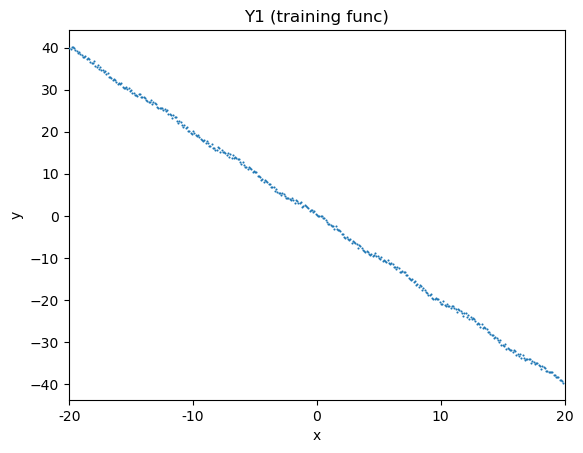

In [25]:
#draw training function1
def main():

    Training_Function1.drawTraining_Function()
    
if __name__=='__main__':
    main()

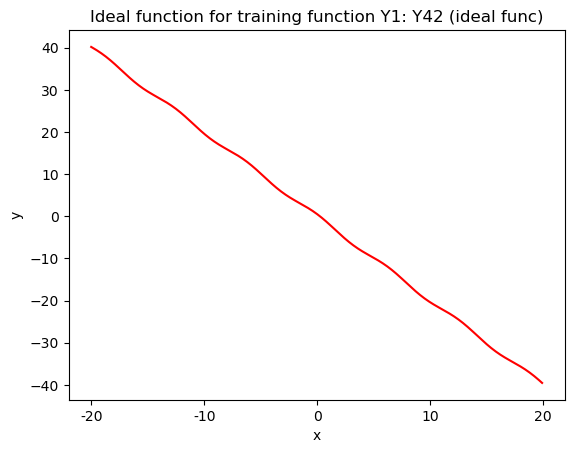

In [26]:
#draw ideal function for training function1
def main():

    Ideal_Function1.drawIdeal_Function()

if __name__=='__main__':
    main()

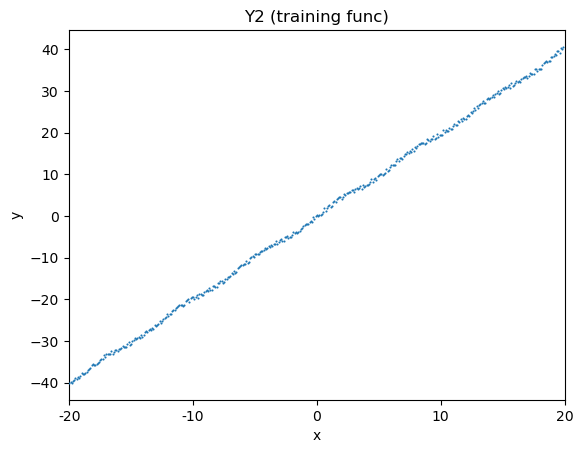

In [27]:
#draw training function2
def main():
    
    Training_Function2.drawTraining_Function()

if __name__=='__main__':
    main()

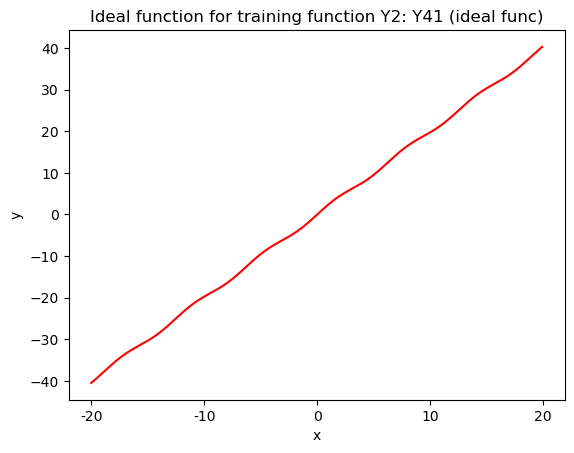

In [28]:
#draw ideal function for training function2
def main():
    
    Ideal_Function2.drawIdeal_Function()

if __name__=='__main__':
    main()

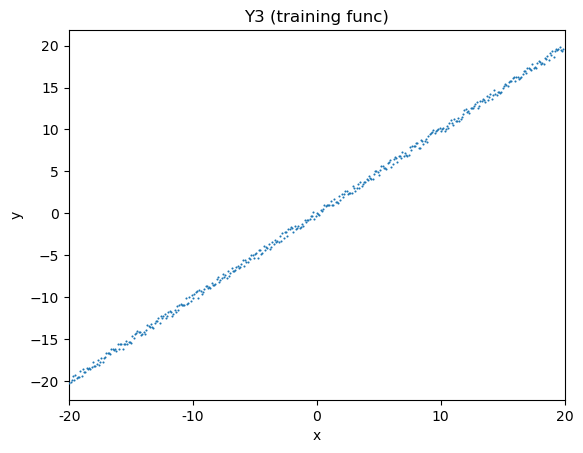

In [29]:
#draw training function 3
def main():
    
    Training_Function3.drawTraining_Function()

if __name__=='__main__':
    main()

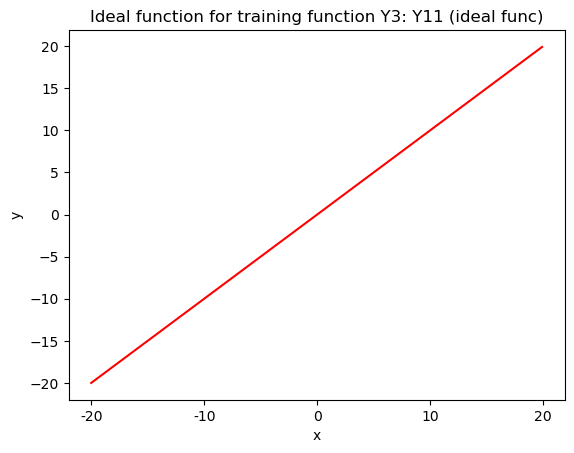

In [30]:
#draw ideal function for training function3
def main():
    
    Ideal_Function3.drawIdeal_Function()

if __name__=='__main__':
    main()

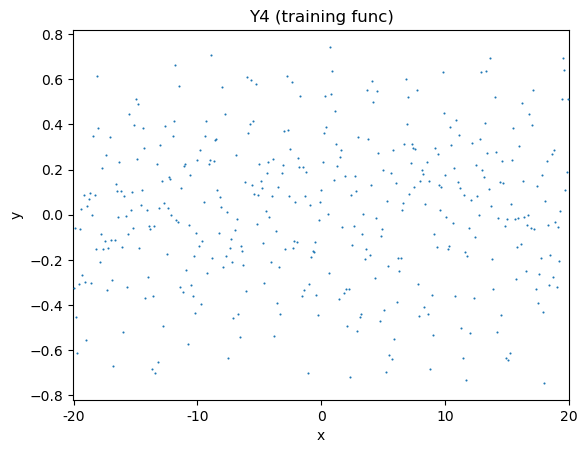

In [31]:
#draw training function 4
def main():

    Training_Function4.drawTraining_Function()

if __name__=='__main__':
    main()

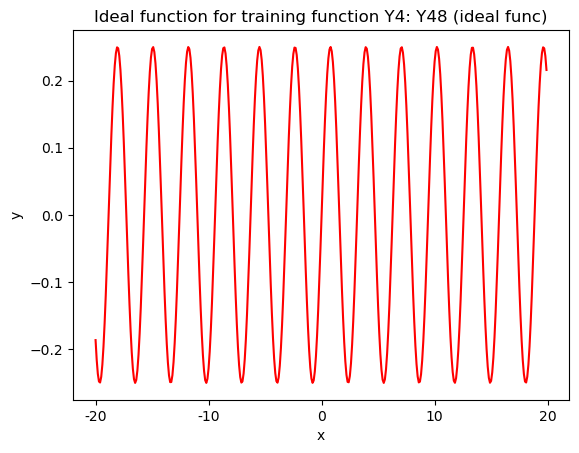

In [32]:
#draw ideal function for training function4
def main(): 

    Ideal_Function4.drawIdeal_Function()

if __name__=='__main__':
    main()

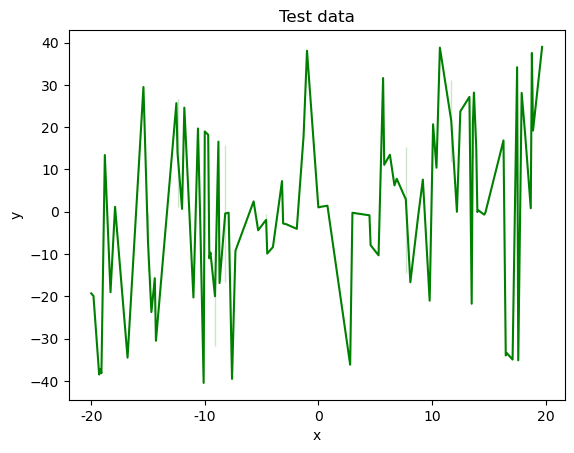

In [33]:
#visualize test data
def main(): 
    
    Test_data_graph1.drawTest_Function()
    
if __name__=='__main__':
    main()

In [34]:
#create merged dataframe with test data, training functions and chosen ideal functions based on x in test data
df_mapped_ideal_functions= pd.merge(
    left=df_test_data,
    right=df_training_data_mapped,
    left_on='x',
    right_on='x',
    how='left')

def main():

    display(df_mapped_ideal_functions.head())

if __name__=='__main__':
    main()

,x,y,Y1 (training func),Y42 (ideal func),Y2 (training func),Y41 (ideal func),Y3 (training func),Y11 (ideal func),Y4 (training func),Y48 (ideal func)
0,17.5,34.161040,-34.705803,-34.890280,34.167114,34.512188,17.326437,17.5,-0.390236,-0.107046
1,0.3,1.215102,-0.144106,-0.122332,0.264334,0.747760,0.426350,0.3,0.523985,0.141161
2,-8.7,-16.843908,16.597107,17.025677,-17.405920,-17.731485,-8.726125,-8.7,0.235796,0.248165
3,-19.2,-37.170870,38.893463,38.869610,-38.806778,-38.571660,-19.533716,-19.2,0.085673,-0.161224
4,-11.0,-20.263054,22.341274,22.002213,-21.440613,-21.500006,-10.796314,-11.0,0.224073,0.002213


In [35]:
#create function to calculate absolute deviation between each test data/ideal function pair

def dev_test_ideal(a,b):
    c=np.absolute(a-b)
    
    return (c)

In [36]:
#run pytest for created function

In [37]:
%%ipytest

def test_dev_test_ideal():
    assert dev_test_ideal(10,15) == 5

.                                                                                            [100%]
1 passed in 0.02s


In [38]:
#calculate deviation between each test data/ideal function pair and insert result into dataframe

#load test data and chosen ideal functions into numpy arrays
test_data_array=df_mapped_ideal_functions.iloc[:,1].to_numpy()
mapped_ideal_func1_array=df_mapped_ideal_functions.iloc[:,3].to_numpy()
mapped_ideal_func2_array=df_mapped_ideal_functions.iloc[:,5].to_numpy()
mapped_ideal_func3_array=df_mapped_ideal_functions.iloc[:,7].to_numpy()
mapped_ideal_func4_array=df_mapped_ideal_functions.iloc[:,9].to_numpy()

#calculate deviation between each test data/ideal function pair using the created function
test_data_ideal_func1_dev=dev_test_ideal(test_data_array,mapped_ideal_func1_array)
test_data_ideal_func2_dev=dev_test_ideal(test_data_array,mapped_ideal_func2_array)
test_data_ideal_func3_dev=dev_test_ideal(test_data_array,mapped_ideal_func3_array)
test_data_ideal_func4_dev=dev_test_ideal(test_data_array,mapped_ideal_func4_array)

#save result back to dataframe
df_test_data_ideal_func1_dev=pd.DataFrame(test_data_ideal_func1_dev)
df_test_data_ideal_func2_dev=pd.DataFrame(test_data_ideal_func2_dev)
df_test_data_ideal_func3_dev=pd.DataFrame(test_data_ideal_func3_dev)
df_test_data_ideal_func4_dev=pd.DataFrame(test_data_ideal_func4_dev)

#create new column labels for deviations
Column1test=name_ideal_function1+' deviation from test data'
Column2test=name_ideal_function2+' deviation from test data'
Column3test=name_ideal_function3+' deviation from test data'
Column4test=name_ideal_function4+' deviation from test data'

#insert dataframes with deviations into exsiting dataframe
df_mapped_ideal_functions_test=df_mapped_ideal_functions.copy()
df_mapped_ideal_functions_test.insert(loc=4, column=Column1test, value=df_test_data_ideal_func1_dev)
df_mapped_ideal_functions_test.insert(loc=7, column=Column2test, value=df_test_data_ideal_func2_dev)
df_mapped_ideal_functions_test.insert(loc=10, column=Column3test, value=df_test_data_ideal_func3_dev)
df_mapped_ideal_functions_test.insert(loc=13, column=Column4test, value=df_test_data_ideal_func4_dev)

def main():

    display(df_mapped_ideal_functions_test.head())

if __name__=='__main__':
    main()

,x,y,Y1 (training func),Y42 (ideal func),Y42 (ideal func) deviation from test data,Y2 (training func),Y41 (ideal func),Y41 (ideal func) deviation from test data,Y3 (training func),Y11 (ideal func),Y11 (ideal func) deviation from test data,Y4 (training func),Y48 (ideal func),Y48 (ideal func) deviation from test data
0,17.5,34.161040,-34.705803,-34.890280,69.051320,34.167114,34.512188,0.351148,17.326437,17.5,16.661040,-0.390236,-0.107046,34.268086
1,0.3,1.215102,-0.144106,-0.122332,1.337434,0.264334,0.747760,0.467342,0.426350,0.3,0.915102,0.523985,0.141161,1.073942
2,-8.7,-16.843908,16.597107,17.025677,33.869585,-17.405920,-17.731485,0.887577,-8.726125,-8.7,8.143908,0.235796,0.248165,17.092073
3,-19.2,-37.170870,38.893463,38.869610,76.040480,-38.806778,-38.571660,1.400790,-19.533716,-19.2,17.970870,0.085673,-0.161224,37.009646
4,-11.0,-20.263054,22.341274,22.002213,42.265267,-21.440613,-21.500006,1.236952,-10.796314,-11.0,9.263054,0.224073,0.002213,20.265267


In [39]:
#drop training functions and ideal function values from dataframe
df_final_mapping=df_mapped_ideal_functions_test.copy()
df_final_mapping.drop(df_final_mapping.columns[[2,3,5,6,8,9,11,12]], axis=1, inplace=True)

def main():

    display(df_final_mapping.head())

if __name__=='__main__':
    main()

,x,y,Y42 (ideal func) deviation from test data,Y41 (ideal func) deviation from test data,Y11 (ideal func) deviation from test data,Y48 (ideal func) deviation from test data
0,17.5,34.161040,69.051320,0.351148,16.661040,34.268086
1,0.3,1.215102,1.337434,0.467342,0.915102,1.073942
2,-8.7,-16.843908,33.869585,0.887577,8.143908,17.092073
3,-19.2,-37.170870,76.040480,1.400790,17.970870,37.009646
4,-11.0,-20.263054,42.265267,1.236952,9.263054,20.265267


In [40]:
#create user-defined exception to check if each chosen ideal function contains values that 
#deviate from test data more than the maximum possible deviation defined earlier

class MyException(Exception):
    def __init__(self, exception_message):
        super().__init__(self, exception_message)

In [41]:
#check exception for ideal function1

def Exception1():

    for i in df_final_mapping.iloc[:, 2]:
        if i > factor1: 
            raise MyException(name_ideal_function1+
                              " contains values that cannnot be mapped to the test function because the deviation is too high")
        else: 
            pass

def main():

    Exception1()
    
if __name__=='__main__':
    main()

MyException: (MyException(...), 'Y42 (ideal func) contains values that cannnot be mapped to the test function because the deviation is too high')

In [42]:
#check exception for ideal function2

def Exception2():

    for i in df_final_mapping.iloc[:, 3]:
        if i > factor2: 
            raise MyException(name_ideal_function2+
                              " contains values that cannnot be mapped to the test function because the deviation is too high")
        else:
            pass

def main():
    
    Exception2()

if __name__=='__main__':
    main()

MyException: (MyException(...), 'Y41 (ideal func) contains values that cannnot be mapped to the test function because the deviation is too high')

In [43]:
#check exception for ideal function3

def Exception3():
    
    for i in df_final_mapping.iloc[:, 4]:
        if i > factor3: 
            raise MyException(name_ideal_function3+
                              " contains values that cannnot be mapped to the test function because the deviation is too high")
        else:
            pass  

def main():
    
    Exception3()

if __name__=='__main__':
    main()        

MyException: (MyException(...), 'Y11 (ideal func) contains values that cannnot be mapped to the test function because the deviation is too high')

In [44]:
#check exception for ideal fucntion4

def Exception4():

    for i in df_final_mapping.iloc[:, 5]:
        if i > factor4: 
            raise MyException(name_ideal_function4+
                              " contains values that cannnot be mapped to the test function because the deviation is too high")
        else:
            pass  
        
def main():
    
    Exception4()

if __name__=='__main__':
    main()

MyException: (MyException(...), 'Y48 (ideal func) contains values that cannnot be mapped to the test function because the deviation is too high')

In [45]:
#for each ideal function check how many test values CAN be mapped based on the criterion and show result in visual
value_count1=str(len(df_final_mapping[df_final_mapping.iloc[:, 2] < factor1]))
value_count2=str(len(df_final_mapping[df_final_mapping.iloc[:, 3] < factor2]))
value_count3=str(len(df_final_mapping[df_final_mapping.iloc[:, 4] < factor3]))
value_count4=str(len(df_final_mapping[df_final_mapping.iloc[:, 5] < factor4]))

#create lists for visualization
ideal_functions_list=list([name_ideal_function1, name_ideal_function2, name_ideal_function3, name_ideal_function4])
possible_matches_list=list([value_count1, value_count2, value_count3, value_count4])

def main(): 
    
    print("Lists for visualization created.")
    
if __name__=='__main__':
    main()

Lists for visualization created.


In [46]:
#for each function visualize how many values match the criterion. It is possible that there is more than one match for each x.
def function_mapping1():
    output_file("ideal_function_values_that_match_criteria.html")
    plot = figure(x_range=ideal_functions_list, height=500, 
                  title="Ideal function values that could be matched to test data\nCriterion:deviation test data/ideal func does not exceed the maximum deviation\ntraining func/ideal func*sqrt(2)\n(Several matches possible for each x in test data)", 
              x_axis_label="Ideal function", y_axis_label="Values matched to test data")
    source = ColumnDataSource(dict(x=ideal_functions_list,y=possible_matches_list))
    labels = LabelSet(x='x', y='y', text='y',x_offset=-13.5, y_offset=5, source=source)
    plot.vbar(x=ideal_functions_list, top=possible_matches_list, width=0.6)
    plot.add_layout(labels)
    show(plot)

def main():
    
    function_mapping1()

if __name__=='__main__':
    main()

In [47]:
#identify values that do not meet the criterion and show values as "10000" in new dataframe

#for each deviation that does not meet the criterion we put "10000"
min_values=df_final_mapping.copy()
min_values1= min_values.iloc[:, 2].mask(min_values.iloc[:, 2] > factor1, 10000)
min_values2= min_values.iloc[:, 3].mask(min_values.iloc[:, 3] > factor2, 10000)
min_values3= min_values.iloc[:, 4].mask(min_values.iloc[:, 4] > factor3, 10000)
min_values4= min_values.iloc[:, 5].mask(min_values.iloc[:, 5] > factor3, 10000)

#save result to new dataframe
min_values_new=[min_values1, min_values2, min_values3, min_values4]
min_values_new_concatenated = pd.concat(min_values_new, axis=1)

def main(): 
    
    display(min_values_new_concatenated.head())
    
if __name__=='__main__':
    main()

,Y42 (ideal func) deviation from test data,Y41 (ideal func) deviation from test data,Y11 (ideal func) deviation from test data,Y48 (ideal func) deviation from test data
0,10000.0,0.351148,10000.0,10000.0
1,10000.0,0.467342,10000.0,10000.0
2,10000.0,10000.000000,10000.0,10000.0
3,10000.0,10000.000000,10000.0,10000.0
4,10000.0,10000.000000,10000.0,10000.0


In [48]:
#for each row find the minimum value and merge the new column with minimum values 
#and the corresponding ideal functions with test data 

#for each row find the minimum value and save the result in a one column data frame
minvalueseries = min_values_new_concatenated.min(axis = 1, skipna=False)
minvalueseries=minvalueseries.fillna(10000)

#find the corresponding function for each miminum value
minvaluefunctions = min_values_new_concatenated.idxmin(axis = 1)

#insert mininum deviations and corresponding column names into test dataframe
df_test_data_best_fit=df_test_data.copy()
df_test_data_best_fit.insert(loc=2, column='Delta Y (test func)', value=minvalueseries)
df_test_data_best_fit.insert(loc=3, column='No. of ideal func', value=minvaluefunctions)

#where the deviation value is set to 10000 specify that there is no ideal function that can be mapped 
#("No match (all deviations too high)")
df_test_data_best_fit.loc[df_test_data_best_fit['Delta Y (test func)'] == 10000, 'No. of ideal func'] = 'NM'
df_test_data_best_fit['No. of ideal func'] = df_test_data_best_fit['No. of ideal func'].str.slice(0,3)
df_test_data_best_fit_=df_test_data_best_fit.replace(to_replace='NM', value='No match (all deviations too high)')
df_test_data_best_fit__=df_test_data_best_fit_.replace(to_replace=10000, value='No match (all deviations too high)')

def main():

    display(df_test_data_best_fit__.head())
    
if __name__=='__main__':
    main()

,x,y,Delta Y (test func),No. of ideal func
0,17.5,34.161040,0.351148,Y41
1,0.3,1.215102,0.467342,Y41
2,-8.7,-16.843908,No match (all deviations too high),No match (all deviations too high)
3,-19.2,-37.170870,No match (all deviations too high),No match (all deviations too high)
4,-11.0,-20.263054,No match (all deviations too high),No match (all deviations too high)


In [50]:
#see how many values in the chosen ideal functions could be assigned to the test data
df_groups = df_test_data_best_fit__.groupby(['No. of ideal func']).size().reset_index(name=
                                                                          'Number of values that could be mapped to test data')
df_groups_sorted=df_groups.sort_values(by=['Number of values that could be mapped to test data'], ascending=False)

def main():

    display(df_groups_sorted)
    
if __name__=='__main__':
    main()

,No. of ideal func,Number of values that could be mapped to test data
0,No match (all deviations too high),53
2,Y41,13
1,Y11,12
3,Y42,11
4,Y48,11


In [51]:
#create lists for visualization
summary_datax=list(df_groups_sorted.iloc[:, 0])
summary_datay=list(df_groups_sorted.iloc[:, 1])

def main(): 
    
    print("Lists for visualization created.")
    
if __name__=='__main__':
    main()

Lists for visualization created.


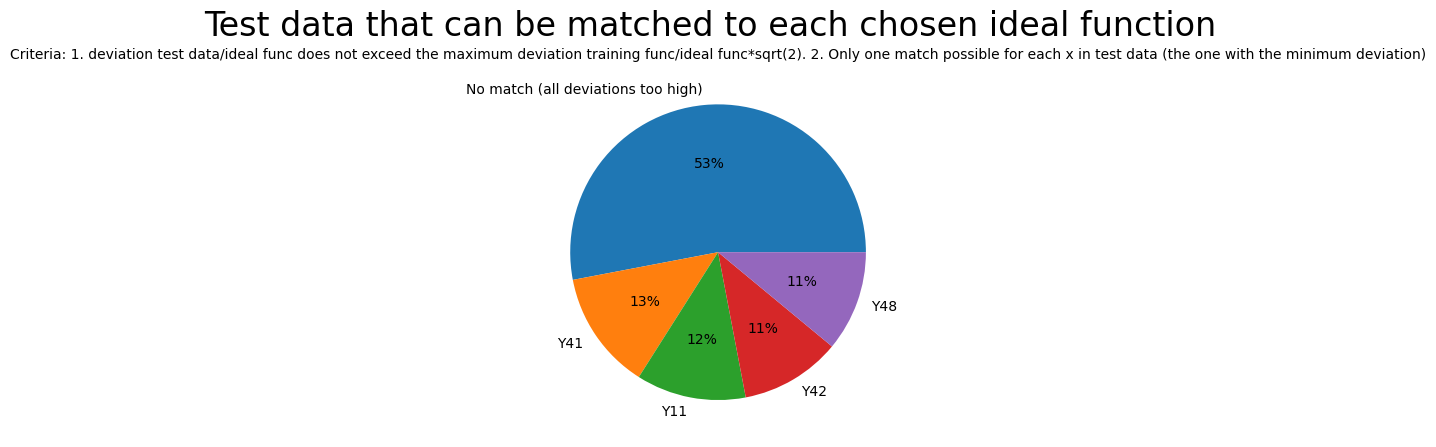

In [52]:
#create pie chart showing final mapping of test data and chosen ideal functions
def function_mapping2():
    plt.pie(summary_datay, labels = summary_datax, autopct='%.0f%%')
    plt.title('Criteria: 1. deviation test data/ideal func does not exceed the maximum deviation training func/ideal func*sqrt(2). 2. Only one match possible for each x in test data (the one with the minimum deviation)',fontsize=10)
    plt.suptitle("Test data that can be matched to each chosen ideal function",fontsize=24, y=1)
    plt.show()
    
def main():
    
    function_mapping2()
    
if __name__=='__main__':
    main()

In [53]:
#upload dataframes with training functions, ideal functions and mapped test functions into sql database.
def database_upload():
    try:
        con = sqlite3.connect("written_assignment.db")
        df_training_data.to_sql("training_data", con, if_exists='replace', index=False, method="multi")
        df_ideal_functions_new.to_sql("ideal_functions", con, if_exists='replace', index=False, method="multi")
        df_test_data_best_fit__.to_sql("test_data_with_mapping_and_y-dev", con, if_exists='replace', index=False, 
                                       method="multi")
    except:
        exception_info = get_exception_info()
        print(exception_info)
    else:
        print('Final dataframes uploaded to database.')
    finally:
        pass    

def main():
    
    database_upload()
    
if __name__=='__main__':
    main()

Final dataframes uploaded to database.
